In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
!pip install dmba
from dmba import regressionSummary
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.3 MB/s eta 0:00:00
no display found. Using non-interactive Agg backend


In [3]:
df_16_50_1=pd.read_csv('/content/drive/MyDrive/Daten ML/Synthdtik Patient/Threshold_16_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_50 (1).csv', keep_default_na=True)

df_16_50_1.columns = [s.strip().replace(' ', '_') for s in df_16_50_1.columns]

df_16_50_1=df_16_50_1.dropna(axis=1)

df_16_50_2=pd.read_csv('/content/drive/MyDrive/Daten ML/Synthdtik Patient/Threshold_16_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_50_v2.csv', keep_default_na=True)

df_16_50_2.columns = [s.strip().replace(' ', '_') for s in df_16_50_2.columns]

df_16_50_2=df_16_50_2.dropna(axis=1)

df_8_50_1=pd.read_csv('/content/drive/MyDrive/Daten ML/Synthdtik Patient/Threshold_8_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_50.csv', keep_default_na=True)

df_8_50_1.columns = [s.strip().replace(' ', '_') for s in df_8_50_1.columns]

df_8_50_1=df_8_50_1.dropna(axis=1)

df_8_50_2=pd.read_csv('/content/drive/MyDrive/Daten ML/Synthdtik Patient/Threshold_8_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_50_v2.csv', keep_default_na=True)

df_8_50_2.columns = [s.strip().replace(' ', '_') for s in df_8_50_2.columns]

df_8_50_2=df_8_50_2.dropna(axis=1)

In [ ]:
unique_values = df_16_50_1['Depression'].unique()
value_counts = df_16_50_1['Depression'].value_counts()
print(value_counts)
print("Einzigartige Ausprägungen in der Spalte 'Depression':")
print(unique_values)

Depression
0    20276
1     3160
Name: count, dtype: int64
Einzigartige Ausprägungen in der Spalte 'Depression':
[0 1]


In [ ]:
unique_values = df_16_50_2['Depression'].unique()
value_counts = df_16_50_2['Depression'].value_counts()
print(value_counts)
print("Einzigartige Ausprägungen in der Spalte 'Depression':")
print(unique_values)

Depression
0    9488
1    5930
Name: count, dtype: int64
Einzigartige Ausprägungen in der Spalte 'Depression':
[0 1]


In [ ]:
unique_values = df_8_50_1['Depression'].unique()
value_counts = df_8_50_1['Depression'].value_counts()
print(value_counts)
print("Einzigartige Ausprägungen in der Spalte 'Depression':")
print(unique_values)

Depression
0    7795
1     312
Name: count, dtype: int64
Einzigartige Ausprägungen in der Spalte 'Depression':
[0 1]


In [ ]:
unique_values = df_8_50_2['Depression'].unique()
value_counts =df_8_50_2['Depression'].value_counts()
print(value_counts)
print("Einzigartige Ausprägungen in der Spalte 'Depression':")
print(unique_values)

Depression
0    2200
1     880
Name: count, dtype: int64
Einzigartige Ausprägungen in der Spalte 'Depression':
[0 1]


In [ ]:
feature_columns = [col for col in df_16_50_2.columns if 'FEATURE' in col]
X = df_16_50_2[feature_columns]
print(X)
Y=df_16_50_2['Depression']
print(Y)

#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)


       FEATURE_0  FEATURE_1  FEATURE_2  FEATURE_3  FEATURE_4  FEATURE_5  \
0       5.580493  -0.411231  -0.411428  -0.411445  -0.374034  -0.411457   
1       3.861378  -0.453200  -0.453373  -0.453438  -0.453020  -0.453440   
2       5.062544  -0.408846  -0.409063  -0.409113   0.062952  -0.409057   
3       4.089550  -0.438238  -0.438416  -0.438428  -0.301683  -0.438405   
4       4.926284  -0.426733  -0.426949  -0.426963  -0.333061  -0.426941   
...          ...        ...        ...        ...        ...        ...   
15413   4.908588  -0.433843  -0.433982  -0.434028  -0.429924  -0.434032   
15414   4.816723  -0.437066  -0.437217  -0.437265  -0.430284  -0.437270   
15415   4.878833  -0.445853  -0.445978  -0.446020  -0.444196  -0.446022   
15416   5.926835  -0.387987  -0.388132  -0.388142  -0.376690  -0.388137   
15417   4.878833  -0.445853  -0.445978  -0.446020  -0.444196  -0.446022   

       FEATURE_6  FEATURE_7  FEATURE_8  FEATURE_9  ...  FEATURE_46  \
0      -0.411433  -0.411445  

In [ ]:
train_Y.unique()

array([0, 1])

0.9545330792267901


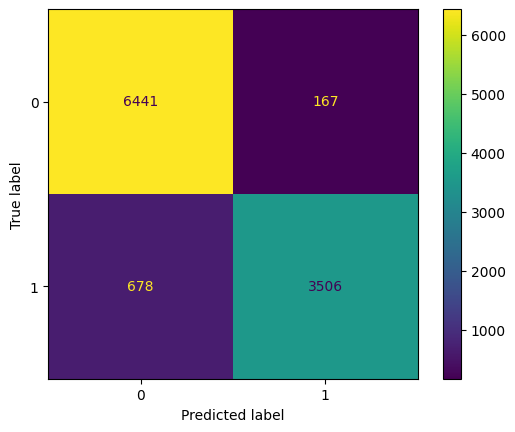

In [ ]:
crossvalidation = KFold(n_splits=20, shuffle=True, random_state=1)
#Baseline Model
GBC1 = GradientBoostingClassifier(n_estimators=250, learning_rate=0.01, max_depth=5, random_state=42)
GBC1.fit(train_X, train_Y)

pred_Y = GBC1.predict(train_X)
Presicion_score=precision_score(train_Y, pred_Y)
print(Presicion_score)
confusion_matrix(train_Y, pred_Y)

ConfusionMatrixDisplay(confusion_matrix(train_Y, pred_Y)).plot()

In [ ]:
GBC=GradientBoostingClassifier()

param_dist = {
    'n_estimators': range(50, 2000, 250),
    'max_depth': range(2, 30, 5),
    'learning_rate': np.arange(0.001, 0.1, 0.05),
    'subsample': np.arange(0.05, 0.8, 0.1)}

rand_search = RandomizedSearchCV(GBC,
                                 param_distributions = param_dist,
                                 n_iter=15,
                                 cv=crossvalidation,
                                 scoring='roc_auc')


hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

#{'subsample': 0.35000000000000003, 'n_estimators': 1550, 'max_depth': 7, 'learning_rate': 0.051000000000000004}
#0.9937706534611227

{'subsample': 0.35000000000000003, 'n_estimators': 1550, 'max_depth': 7, 'learning_rate': 0.051000000000000004}
0.9937706534611227


1.0


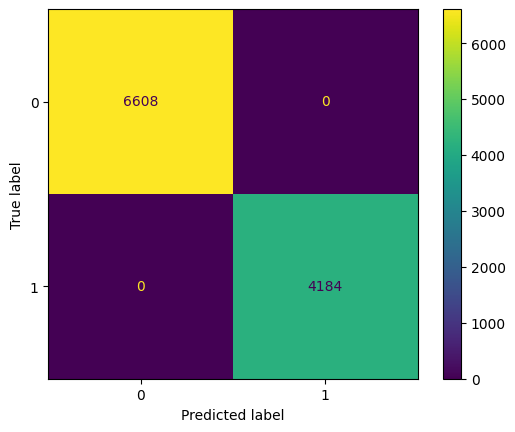

In [ ]:
GBC2=GradientBoostingClassifier(n_estimators= 1550, max_depth= 7, learning_rate= 0.051, subsample= 0.35, random_state=42)
GBC2.fit(train_X, train_Y)
#Classification

pred_Y = GBC2.predict(train_X)
Presicion_score=precision_score(train_Y, pred_Y)
print(Presicion_score)
confusion_matrix(train_Y, pred_Y)

ConfusionMatrixDisplay(confusion_matrix(train_Y, pred_Y)).plot()



0.9994275901545506
0.9997838305231301
0.9994275901545506
1.0
0.9997137131405668


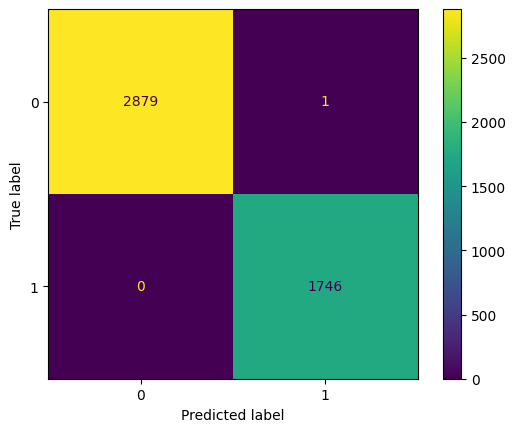

In [ ]:
pred_Y = GBC2.predict(test_X)
Presicion_score=precision_score(test_Y, pred_Y)
print(Presicion_score)
cm=confusion_matrix(test_Y, pred_Y)

ConfusionMatrixDisplay(cm).plot()


TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN) # True positive rate
FNR = FN / (TP + FN) # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

print(accuracy)
print(precision)
print(recall)
print(f1)

AUC-Wert: 1.0


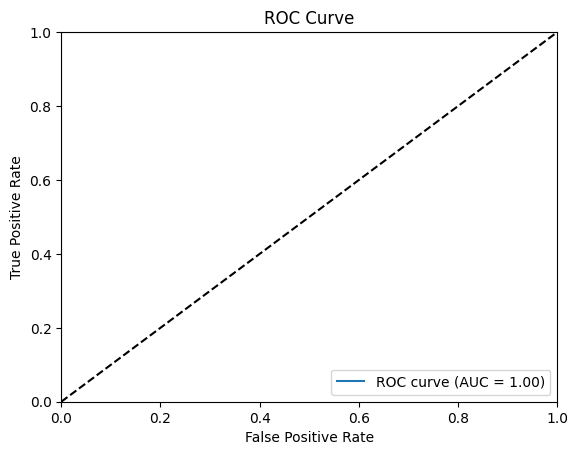

In [ ]:
#AUC

y_pred_proba = GBC2.predict_proba(test_X)[:, 1]
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

import matplotlib.pyplot as plt

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# ROC-Kurve zeichnen
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Datensatz 2: TH: 16, Operator MH_PHQ_S_Sampling 1

{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.075}
0.9967247902212645
0.9863013698630136
0.9741146351870289
0.9863013698630136
0.822429906542056
0.8969422423556058
AUC-Wert: 0.9978889306448002


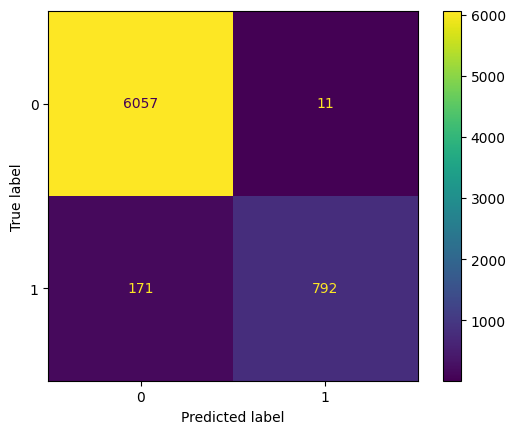

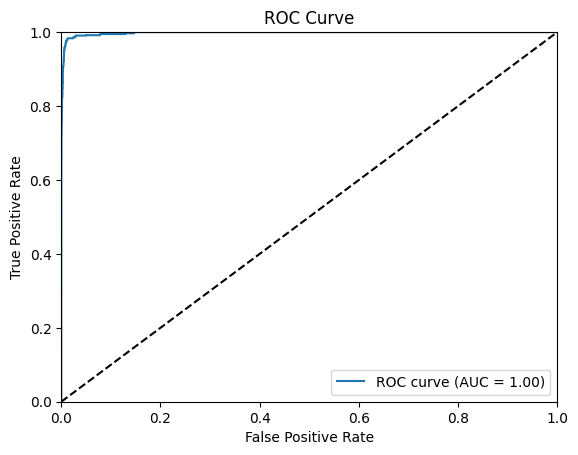

In [ ]:
crossvalidation = KFold(n_splits=20, shuffle=True, random_state=1)
feature_columns = [col for col in df_16_50_1.columns if 'FEATURE' in col]
X = df_16_50_1[feature_columns]
Y=df_16_50_1['Depression']

#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

GBC=GradientBoostingClassifier()

param_dist = {'n_estimators': [50,100,150,200],
              'max_depth': [1,5,10],
             'learning_rate':[0.001, 0.01, 0.075],
             'subsample': [0.5, 0.7, 0.8]}


rand_search = RandomizedSearchCV(GBC,
                                 param_distributions = param_dist,
                                 n_iter=1,
                                 cv=crossvalidation,
                                 scoring='roc_auc')


hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

GBC2=GradientBoostingClassifier(**best_parm)
GBC2.fit(train_X, train_Y)

pred_Y = GBC2.predict(test_X)
Presicion_score=precision_score(test_Y, pred_Y)
print(Presicion_score)
cm=confusion_matrix(test_Y, pred_Y)

ConfusionMatrixDisplay(cm).plot()


TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN) # True positive rate
FNR = FN / (TP + FN) # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

print(accuracy)
print(precision)
print(recall)
print(f1)

y_pred_proba = GBC2.predict_proba(test_X)[:, 1]
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

import matplotlib.pyplot as plt

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# ROC-Kurve zeichnen
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Datensatz 3: TH: 8, Operator MH_PHQ_S_Sampling 1

{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.075}
0.9752059775954018
0.9494949494949495
0.9963008631319359
0.9494949494949495
0.9591836734693877
0.9543147208121828
AUC-Wert: 0.9847528733120657


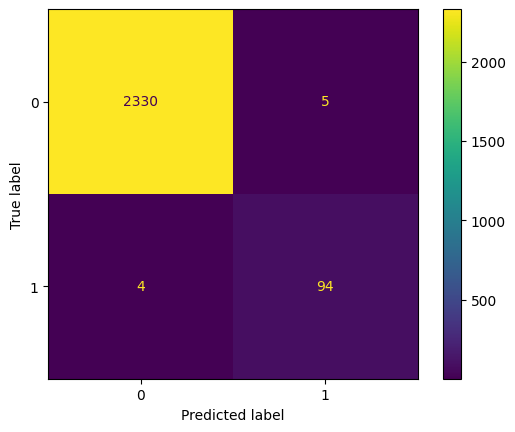

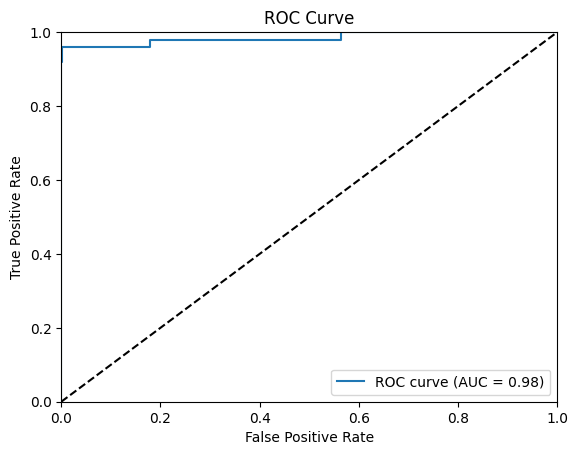

In [8]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
feature_columns = [col for col in df_8_50_1.columns if 'FEATURE' in col]
X = df_8_50_1[feature_columns]
Y=df_8_50_1['Depression']

#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

GBC=GradientBoostingClassifier()

param_dist = {'n_estimators': [50,100,200,2000],
              'max_depth': [5,10,15,32],
             'learning_rate':[0.001, 0.01, 0.075,0.1],
             'subsample': [0.5, 0.6, 0.7, 0.8]}


rand_search = RandomizedSearchCV(GBC,
                                 param_distributions = param_dist,
                                 n_iter=1,
                                 cv=crossvalidation,
                                 scoring='roc_auc')


hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

GBC2=GradientBoostingClassifier(**best_parm)
GBC2.fit(train_X, train_Y)

pred_Y = GBC2.predict(test_X)
Presicion_score=precision_score(test_Y, pred_Y)
print(Presicion_score)
cm=confusion_matrix(test_Y, pred_Y)

ConfusionMatrixDisplay(cm).plot()


TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN) # True positive rate
FNR = FN / (TP + FN) # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

print(accuracy)
print(precision)
print(recall)
print(f1)

y_pred_proba = GBC2.predict_proba(test_X)[:, 1]
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

import matplotlib.pyplot as plt

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# ROC-Kurve zeichnen
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Datensatz 4: TH: 8, Operator MH_PHQ_S_Sampling 2

{'subsample': 0.45000000000000007, 'n_estimators': 1050, 'max_depth': 12, 'learning_rate': 0.051000000000000004}
1.0
0.9884169884169884
0.9967532467532467
0.9884169884169884
1.0
0.9941747572815534
AUC-Wert: 1.0


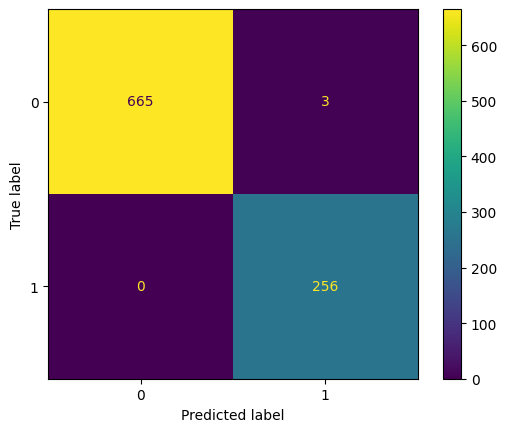

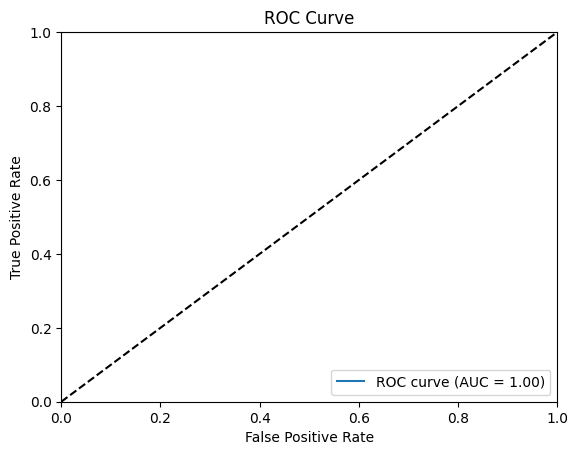

In [10]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
feature_columns = [col for col in df_8_50_2.columns if 'FEATURE' in col]
X = df_8_50_2[feature_columns]
Y=df_8_50_2['Depression']

#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

GBC=GradientBoostingClassifier()

param_dist = {
    'n_estimators': range(50, 2000, 250),
    'max_depth': range(2, 30, 5),
    'learning_rate': np.arange(0.001, 0.1, 0.05),
    'subsample': np.arange(0.05, 0.8, 0.1)}


rand_search = RandomizedSearchCV(GBC,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=crossvalidation,
                                 scoring='roc_auc')


hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

GBC2=GradientBoostingClassifier(**best_parm)
GBC2.fit(train_X, train_Y)

pred_Y = GBC2.predict(test_X)
Presicion_score=precision_score(test_Y, pred_Y)
print(Presicion_score)
cm=confusion_matrix(test_Y, pred_Y)

ConfusionMatrixDisplay(cm).plot()


TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN) # True positive rate
FNR = FN / (TP + FN) # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

print(accuracy)
print(precision)
print(recall)
print(f1)

y_pred_proba = GBC2.predict_proba(test_X)[:, 1]
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

import matplotlib.pyplot as plt

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# ROC-Kurve zeichnen
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()